Here we present the first example for the usage of pyiron-damask integration.
Within this notebook, user can define their own geometry files, material properties, and loading steps for the tensile test of the steel with different number of grains.

Basically, the inputs from the user's side are:

[x] Number of grains

[x] Size of the steel cubic

[x] Resoution of the cubic(the number of finite element grid in x,y,z direction)

[x] Elastic material parameter, i.e., Youngs modulus, poisson ratio...

[x] Loading steps for the tensile test

On the output side, pyiron-damask integration can offer:

[x] All the component of Cauchy stress, 1st Piola-Kirchoff stress

[x] All the comonent of strain tensor

[x] vonMises stress

In [1]:
# Here we import the basic components from pyiron-damask
from pyiron_base import Project
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from pyiron_continuum.damask import damaskjob # this one is required for the pyiron-damask job

In [2]:
# Firstly, we need to create a project
pr = Project('tensile')
pr.remove_jobs_silently(recursive=True)

In [3]:
# Next, we need to tell pyiron, we want to create a damask type job
job = pr.create_job(damaskjob.DAMASK, 'damask_job')

In [4]:
# Now, lets set up the geometry size for the simulation
# user can give the number of grains (grains)
#               the size of the steel cubic (size)
#               the resolution/mesh number of the cubic(grids)
job.generategeometryyaml(size=1.0e-5,grains=4,grids=16)

In [5]:
# Now, we can define the material properties for the steel/aluminum cubic with different elastic properties
# materialphase-->defines the aluminum or steel database from damask
# homogenizationmethod-->select the homogenization method for the calculation
# c11,c12,c44-->defines the elastic constant for the material
job.generatematerialyaml(materialphase='Aluminum',homogenizationmethod='SX',c11=106.75e+9,c12=60.41e+9,c44=28.34e+9)

In [6]:
print(job.input.material)

DataContainer({'material': DataContainer([DataContainer({'constituents': DataContainer([DataContainer({'O': DataContainer([0.8202782408828724, -0.10236674596960525, 0.42693539382564505, -0.3665935437956267]), 'phase': 'Aluminum', 'v': 1.0})]), 'homogenization': 'SX'}), DataContainer({'constituents': DataContainer([DataContainer({'O': DataContainer([0.28322812575814876, -0.19416419276715946, -0.8416297773874354, -0.4168229994150747]), 'phase': 'Aluminum', 'v': 1.0})]), 'homogenization': 'SX'}), DataContainer({'constituents': DataContainer([DataContainer({'O': DataContainer([0.5686339392639893, 0.48961816764279936, -0.5473399541785959, 0.37060554177048916]), 'phase': 'Aluminum', 'v': 1.0})]), 'homogenization': 'SX'}), DataContainer({'constituents': DataContainer([DataContainer({'O': DataContainer([0.5405757025383835, 0.5995076834658485, -0.40015372723432735, -0.43387261018762235]), 'phase': 'Aluminum', 'v': 1.0})]), 'homogenization': 'SX'})]), 'homogenization': DataContainer({'SX': DataC

In [10]:
# Now we can define the loading conditions for the tensile test
# loadfilename-->defines the yaml file name for loading(which will be used by damask)
# loadtype-->let users to choose wether we do the tensile test or the shear test
# time    -->time step size
# step    -->simulation/loaiding steps
# interval-->output interval
job.generateloadyaml(loadfilename='tensionX.yaml',loadtype='tensile',time=1.0,step=5,interval=1)

In [11]:
print(job.input.loading)

DataContainer({'loadfile': 'tensionX.yaml', 'time': 1.0, 'step': 5, 'interval': 1})


In [12]:
### now, since everyting is ready, we can run the tensile test simulation
job.Run()

In [13]:
### once the simulation is done, we can keep all the results, i.e., stress, strain, vonMises stress, etc.
job.SaveResult()

Result is saved to: Polycystal_4_16x16x16_tensionX.hdf5


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varepsilon_{VM} $', ylabel='$\\sigma_{VM}$ (MPa)'>)

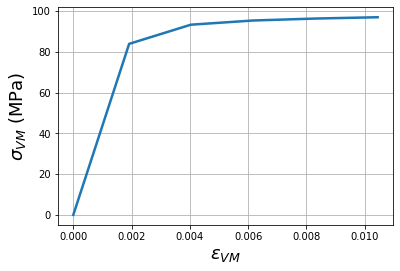

In [14]:
# Now let's have a look at the stress strain curve
job.PlotStressStrain()